# Loading data

In [1]:
import pandas as pd

In [2]:
jar = pd.read_csv('fuel_swelling_5-grains_no-fitting.csv')

In [3]:
jar

,Grain-size-ratio index,Grain Size (um),Operation Days,Heat Flux (W/cm2),Fission Rate (10^14 f/cm3/s),Coolant init Temp (C),Fuel Temp (C),Fission Density (10^21 f/cm3),Fuel Swelling (%),Fuel Gas Swelling (%)
0,1,1.34,3,80.0,2,60,82.434301,0.05184,0.220850,0.013490
1,1,1.34,4,80.0,2,60,82.435988,0.06912,0.311495,0.035015
2,1,1.34,5,80.0,2,60,82.443824,0.08640,0.413397,0.067797
3,1,1.34,6,80.0,2,60,82.446168,0.10368,0.525515,0.110795
4,1,1.34,7,80.0,2,60,82.448867,0.12096,0.646617,0.162777
...,...,...,...,...,...,...,...,...,...,...
22741,5,34.00,77,400.0,10,120,210.000096,6.65280,50.985029,24.373829
22742,5,34.00,78,400.0,10,120,210.277457,6.73920,52.050844,25.094044
22743,5,34.00,79,400.0,10,120,210.468522,6.82560,53.466086,26.163686
22744,5,34.00,80,400.0,10,120,210.763922,6.91200,54.909245,27.261245


In [4]:
tra1 = jar.truncate(after=381)
tra2 = jar[893:1277]
tra3 = jar[1788:2166]
tra4 = jar[2677:3064]
tra5 = jar[3575:3955]

# Data preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    jar[['Grain Size (um)', 'Fission Density (10^21 f/cm3)', 'Fission Rate (10^14 f/cm3/s)', 'Coolant init Temp (C)']].values,
    jar['Fuel Gas Swelling (%)'].values, test_size=0.2, random_state=721)

In [8]:
st_scaler = StandardScaler()
X_train_scaled = st_scaler.fit_transform(X_train)
X_test_scaled = st_scaler.transform(X_test)

# Decision tree

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt_reg = DecisionTreeRegressor(random_state=0)

In [49]:
dt_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
from sklearn import metrics

In [51]:
y_pred = dt_reg.predict(X_test_scaled)
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))
print("Exp. Var.: ", metrics.explained_variance_score(y_test, y_pred))

MSE:  0.2704993013407193
R2 score:  0.9984555071519351
Exp. Var.:  0.9984729739798285


In [52]:
import matplotlib.pyplot as plt

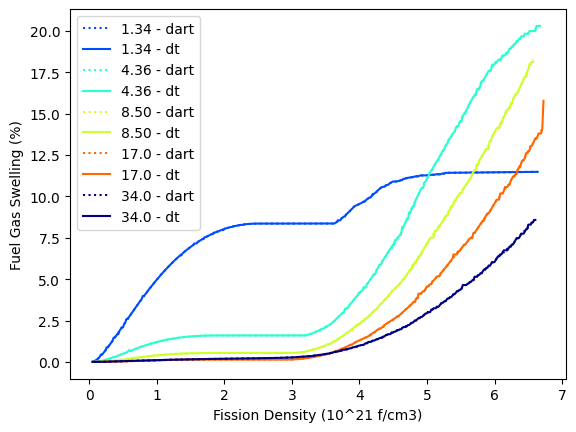

In [53]:
for tra, yeet, col in zip([tra1, tra2, tra3, tra4, tra5], ['1.34', '4.36', '8.50', '17.0', '34.0'], [0.2, 0.4, 0.6, 0.8, 1]):
    X_test_p = tra[['Grain Size (um)', 'Fission Density (10^21 f/cm3)', 'Fission Rate (10^14 f/cm3/s)', 'Coolant init Temp (C)']].values
    X_test_p = st_scaler.transform(X_test_p)
    y_pred_p = dt_reg.predict(X_test_p)
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, tra['Fuel Gas Swelling (%)'], color=plt.cm.jet(col), ls=':', label=f'{yeet} - dart')
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, y_pred_p, color=plt.cm.jet(col), label=f'{yeet} - dt')

plt.xlabel('Fission Density (10^21 f/cm3)')
plt.ylabel('Fuel Gas Swelling (%)')
plt.legend()
plt.show()

In [54]:
dt_reg.tree_.max_depth

29

In [66]:
dt_reg2 = DecisionTreeRegressor(random_state=0, max_depth=9)

In [67]:
dt_reg2.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=9, random_state=0)

In [68]:
y_pred = dt_reg2.predict(X_test_scaled)
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))
print("Exp. Var.: ", metrics.explained_variance_score(y_test, y_pred))

MSE:  3.6528241297977555
R2 score:  0.9791431596468142
Exp. Var.:  0.9791433657582544


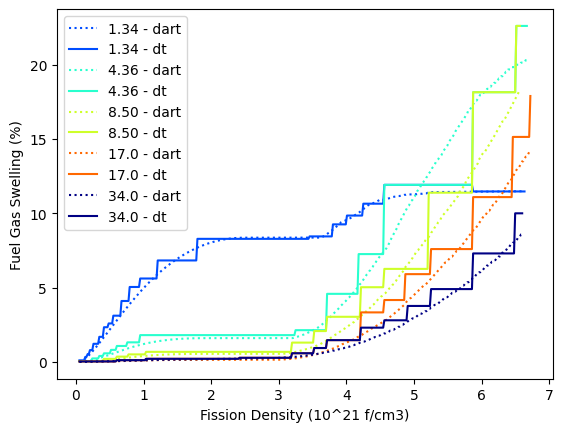

In [69]:
for tra, yeet, col in zip([tra1, tra2, tra3, tra4, tra5], ['1.34', '4.36', '8.50', '17.0', '34.0'], [0.2, 0.4, 0.6, 0.8, 1]):
    X_test_p = tra[['Grain Size (um)', 'Fission Density (10^21 f/cm3)', 'Fission Rate (10^14 f/cm3/s)', 'Coolant init Temp (C)']].values
    X_test_p = st_scaler.transform(X_test_p)
    y_pred_p = dt_reg2.predict(X_test_p)
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, tra['Fuel Gas Swelling (%)'], color=plt.cm.jet(col), ls=':', label=f'{yeet} - dart')
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, y_pred_p, color=plt.cm.jet(col), label=f'{yeet} - dt')

plt.xlabel('Fission Density (10^21 f/cm3)')
plt.ylabel('Fuel Gas Swelling (%)')
plt.legend()
plt.show()

In [70]:
dt_reg2.tree_.max_depth

9

## Decision trees are useless

# Neural network

In [18]:
from tensorflow import keras

2022-12-07 11:54:00.259978: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 11:54:00.339585: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 11:54:00.339598: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-07 11:54:00.868218: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [104]:
netw = keras.models.Sequential()
netw.add(keras.layers.Dense(8, activation='sigmoid', input_shape=(4,)))
netw.add(keras.layers.Dense(8, activation='sigmoid'))
netw.add(keras.layers.Dense(8, activation='sigmoid'))
netw.add(keras.layers.Dense(1, activation='linear'))
netw.compile(loss='mse', optimizer='adam')

In [105]:
hist = netw.fit(X_train_scaled, y_train, validation_split=0.2,
                batch_size=128, epochs=500)

Epoch 1/500
114/114 [==============================] - 1s 2ms/step - loss: 285.0043 - val_loss: 267.3798
Epoch 2/500
114/114 [==============================] - 0s 1ms/step - loss: 263.3337 - val_loss: 248.7226
Epoch 3/500
114/114 [==============================] - 0s 1ms/step - loss: 247.2787 - val_loss: 235.8684
Epoch 4/500
114/114 [==============================] - 0s 1ms/step - loss: 235.9272 - val_loss: 226.2089
Epoch 5/500
114/114 [==============================] - 0s 1ms/step - loss: 226.5028 - val_loss: 217.2840
Epoch 6/500
114/114 [==============================] - 0s 1ms/step - loss: 217.8011 - val_loss: 209.5568
Epoch 7/500
114/114 [==============================] - 0s 1ms/step - loss: 210.6377 - val_loss: 203.4743
Epoch 8/500
114/114 [==============================] - 0s 1ms/step - loss: 204.9425 - val_loss: 198.6132
Epoch 9/500
114/114 [==============================] - 0s 1ms/step - loss: 200.3646 - val_loss: 194.7038
Epoch 10/500
114/114 [==============================] -

In [106]:
y_pred = netw.predict(X_test_scaled)
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))
print("Exp. Var.: ", metrics.explained_variance_score(y_test, y_pred))

143/143 [==============================] - 0s 632us/step
MSE:  0.4501731846130039
R2 score:  0.9974296079118163
Exp. Var.:  0.9974403046773451


12/12 [==============================] - 0s 831us/step


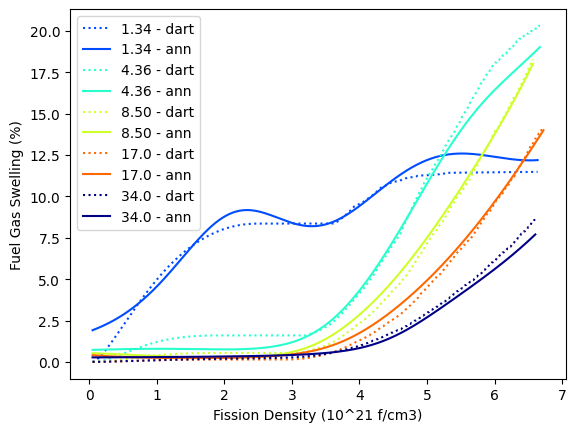

In [107]:
for tra, yeet, col in zip([tra1, tra2, tra3, tra4, tra5], ['1.34', '4.36', '8.50', '17.0', '34.0'], [0.2, 0.4, 0.6, 0.8, 1]):
    X_test_p = tra[['Grain Size (um)', 'Fission Density (10^21 f/cm3)', 'Fission Rate (10^14 f/cm3/s)', 'Coolant init Temp (C)']].values
    X_test_p = st_scaler.transform(X_test_p)
    y_pred_p = netw.predict(X_test_p)
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, tra['Fuel Gas Swelling (%)'], color=plt.cm.jet(col), ls=':', label=f'{yeet} - dart')
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, y_pred_p, color=plt.cm.jet(col), label=f'{yeet} - ann')

plt.xlabel('Fission Density (10^21 f/cm3)')
plt.ylabel('Fuel Gas Swelling (%)')
plt.legend()
plt.show()

In [24]:
from ann_visualizer.visualize import ann_viz

In [108]:
ann_viz(netw, title='ANN for fuel gas swelling')

In [27]:
netw.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [28]:
netw.get_weights()

[array([[-0.89364517,  3.4059682 , -0.34773976, -7.2708697 ],
        [ 3.6000957 , -1.490443  ,  3.8316007 ,  2.4208472 ],
        [ 1.6154139 , -1.8458911 ,  0.7690188 , -0.05407998],
        [ 1.1284481 , -0.83622813,  0.8792164 ,  0.15964663]],
       dtype=float32),
 array([-6.7853723,  5.8338037, -3.0653703, -5.1915574], dtype=float32),
 array([[ 16.240395],
        [-11.345471],
        [ 14.721508],
        [ 13.547214]], dtype=float32),
 array([11.77828], dtype=float32)]

In [29]:
netw.layers[0].get_weights()[0]

array([[-0.89364517,  3.4059682 , -0.34773976, -7.2708697 ],
       [ 3.6000957 , -1.490443  ,  3.8316007 ,  2.4208472 ],
       [ 1.6154139 , -1.8458911 ,  0.7690188 , -0.05407998],
       [ 1.1284481 , -0.83622813,  0.8792164 ,  0.15964663]],
      dtype=float32)

In [30]:
netw.layers[0].get_weights()[1]

array([-6.7853723,  5.8338037, -3.0653703, -5.1915574], dtype=float32)

# Function (Jahid's) fitting

\begin{equation}
f_1 = \frac{L}{1 + \exp[-k(x-x_0)]} \\
f_2 = a \times D + b \\
f_3 = c \times r + d \\
f_4 = p \times T + q \\
fgs = f_1(x) * f_2(D) * f_3(r) * f_4(T)
\end{equation}

In [31]:
import numpy as np

In [32]:
from scipy.optimize import curve_fit

In [33]:
def f1(x, l, k, x0):
    return l / (1 + np.exp(-k * (x-x0)))

In [34]:
popt, pcov = curve_fit(f1,
                       jar['Fission Density (10^21 f/cm3)'],
                       jar['Fuel Gas Swelling (%)'],
                       bounds=([0,0,0], [np.inf, np.inf, np.inf]))

In [35]:
popt

array([46.00820038,  0.75385023,  5.81908077])

In [36]:
def f2(x, a, b):
    fd, D = x
    return f1(fd, 46, 0.754, 5.82) * (a * D + b)

In [37]:
popt, pcov = curve_fit(f2,
                       (jar['Fission Density (10^21 f/cm3)'], jar['Grain Size (um)']),
                       jar['Fuel Gas Swelling (%)'])

In [38]:
popt

array([-0.03168317,  1.4135512 ])

In [39]:
def f3(x, c, d):
    fd, D, r = x
    return f2((fd, D), -0.0317, 1.414) * (c * r + d)

In [40]:
popt, pcov = curve_fit(f3,
                       (jar['Fission Density (10^21 f/cm3)'], jar['Grain Size (um)'],
                       jar['Fission Rate (10^14 f/cm3/s)']),
                       jar['Fuel Gas Swelling (%)'])

In [41]:
popt

array([0.11765596, 0.47635869])

In [42]:
def f4(x, p, q):
    fd, D, r, T = x
    return f3((fd, D, r), 0.118, 0.476) * (p * T + q)

In [43]:
popt, pcov = curve_fit(f4,
                       (jar['Fission Density (10^21 f/cm3)'], jar['Grain Size (um)'],
                       jar['Fission Rate (10^14 f/cm3/s)'], jar['Coolant init Temp (C)']),
                       jar['Fuel Gas Swelling (%)'])

In [44]:
popt

array([0.00937539, 0.15593714])

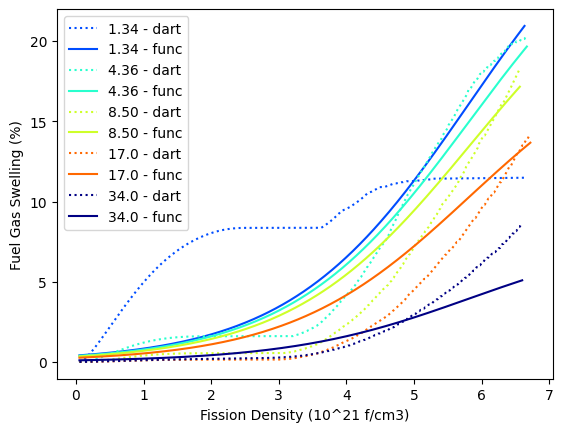

In [45]:
for tra, yeet, col in zip([tra1, tra2, tra3, tra4, tra5], ['1.34', '4.36', '8.50', '17.0', '34.0'], [0.2, 0.4, 0.6, 0.8, 1]):
    X_test_p = (tra['Fission Density (10^21 f/cm3)'], tra['Grain Size (um)'],
                tra['Fission Rate (10^14 f/cm3/s)'], tra['Coolant init Temp (C)'])
    y_pred_p = f4(X_test_p, 0.00937539, 0.15593714)
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, tra['Fuel Gas Swelling (%)'], color=plt.cm.jet(col), ls=':', label=f'{yeet} - dart')
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, y_pred_p, color=plt.cm.jet(col), label=f'{yeet} - func')

plt.xlabel('Fission Density (10^21 f/cm3)')
plt.ylabel('Fuel Gas Swelling (%)')
plt.legend()
plt.show()

In [114]:
def of1(x, l, k, x0):
    return l / (1 + np.exp(-k * (x-x0)))

def of2(x, a, b):
    fd, D = x
    return of1(fd, 42.9, 1.13, 5.47) * (a * D + b)

def of3(x, c, d, e):
    fd, D, r, T = x
    return of2((fd, D), -0.0527, 1.54) * (c * r + d * T + e)

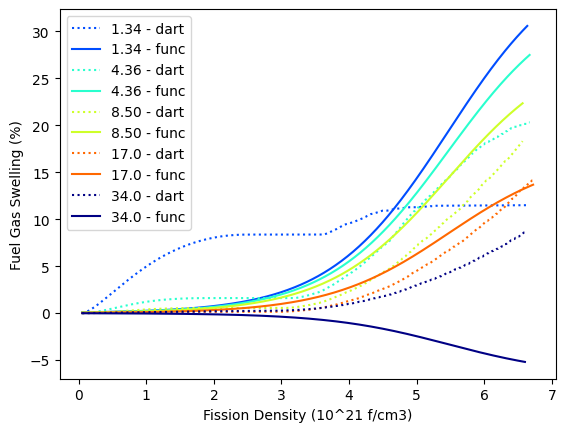

In [115]:
for tra, yeet, col in zip([tra1, tra2, tra3, tra4, tra5], ['1.34', '4.36', '8.50', '17.0', '34.0'], [0.2, 0.4, 0.6, 0.8, 1]):
    X_test_p = (tra['Fission Density (10^21 f/cm3)'], tra['Grain Size (um)'],
                tra['Fission Rate (10^14 f/cm3/s)'], tra['Coolant init Temp (C)'])
    y_pred_p = of3(X_test_p, 0.10762374, 0.00120756, 0.32694967)
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, tra['Fuel Gas Swelling (%)'], color=plt.cm.jet(col), ls=':', label=f'{yeet} - dart')
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, y_pred_p, color=plt.cm.jet(col), label=f'{yeet} - func')

plt.xlabel('Fission Density (10^21 f/cm3)')
plt.ylabel('Fuel Gas Swelling (%)')
plt.legend()
plt.show()

## The old functions are also useless

# Function (Ben's) fitting